# Predicting Possible Loan Defaults

Author: Necky Tran <br>
Date: 31/01/24

### Table of Contents

1. [Introduction](#Introduction)
2. [Cleaning](#Cleaning)
3. [Model Training](#Model_Training)
4. [Summary](#Summary)

# Introduction
This notebook contains a Loan Classification Dataset. The dataset is sourced from Kaggle : https://www.kaggle.com/datasets/abhishek14398/loan-dataset/data
-  The objective is to efficiently train classification models and compare their performance
-  Due to the dataset's size and complexity, extensive Exploratory Data Analysis (EDA) will be limited. Instead, I will manually select features deemed suitable for the model
-  The model's aim is to forecast the likelihood of customers defaulting on loans.


| Feature | Description |
|----------|----------|
|loan_status| Current status of the loan (Target variable)|
|annual_inc|The self-reported annual income provided by the borrower during registration.|
|dti|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
|grade|LC assigned loan grade|
|home_ownership|The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER|
|inq_last_6mths|The number of inquiries in past 6 months (excluding auto and mortgage inquiries)|
|installment|The monthly payment owed by the borrower if the loan originates.|
|int_rate|Interest Rate on the loan|
|loan_amnt|The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value|
|open_acc|The number of open credit lines in the borrower's credit file.|
|pub_rec|Number of derogatory public records|
|purpose| A category provided by the borrower for the loan request|
|revol_bal| Total credit revolving balance|
|term| The number of payments on the loan. Values are in months and can be either 36 or 60|
|total_acc| The total number of credit lines currently in the borrower's credit file|
|total_rec_late_fee|Late fees received to date|
|verification_status| Indicates if income was verified by LC, not verified, or if the income source was verified|



# Cleaning
- select the features and quickly examine distributions/multicolinearity

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# load data
loan_df = pd.read_csv('loan_data.csv')
# view first rows
loan_df.head()

C:\Users\trann\AppData\Local\Temp\ipykernel_15472\1077288624.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan_data.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [37]:
# loan_df = loan_df[['loan_status','annual_inc', 'dti', 'grade', 'home_ownership', 'inq_last_6mths', 'installment', 'int_rate', 'loan_amnt', 'open_acc', 'pub_rec', 'purpose', 'revol_bal', 'term', 'total_acc', 'total_rec_late_fee', 'verification_status']]

loan_df = loan_df[['loan_status','annual_inc', 'dti', 'grade', 'home_ownership', 'inq_last_6mths','delinq_2yrs', 'installment', 'int_rate', 'loan_amnt', 'open_acc', 'pub_rec', 'purpose', 'revol_bal', 'term', 'total_acc', 'total_rec_late_fee', 'verification_status']]

In [38]:
# Check Shape, Info(Number of Rows and Columns) and datatype of loan data

print("Shape of the data frame :",loan_df.shape)
print("===================================================")
print(loan_df.info())

Shape of the data frame : (39717, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          39717 non-null  object 
 1   annual_inc           39717 non-null  float64
 2   dti                  39717 non-null  float64
 3   grade                39717 non-null  object 
 4   home_ownership       39717 non-null  object 
 5   inq_last_6mths       39717 non-null  int64  
 6   delinq_2yrs          39717 non-null  int64  
 7   installment          39717 non-null  float64
 8   int_rate             39717 non-null  object 
 9   loan_amnt            39717 non-null  int64  
 10  open_acc             39717 non-null  int64  
 11  pub_rec              39717 non-null  int64  
 12  purpose              39717 non-null  object 
 13  revol_bal            39717 non-null  int64  
 14  term                 39717 non-null  object 
 15

Rows: 39717 <br>
Columns : 18

Loan Status is our target variable
- it is the label for a person that has fully paid off their loan or defaulted ('charged off')

int_rate is an object type right now
- change it into a float

In [39]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype(float)

In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          39717 non-null  object 
 1   annual_inc           39717 non-null  float64
 2   dti                  39717 non-null  float64
 3   grade                39717 non-null  object 
 4   home_ownership       39717 non-null  object 
 5   inq_last_6mths       39717 non-null  int64  
 6   delinq_2yrs          39717 non-null  int64  
 7   installment          39717 non-null  float64
 8   int_rate             39717 non-null  float64
 9   loan_amnt            39717 non-null  int64  
 10  open_acc             39717 non-null  int64  
 11  pub_rec              39717 non-null  int64  
 12  purpose              39717 non-null  object 
 13  revol_bal            39717 non-null  int64  
 14  term                 39717 non-null  object 
 15  total_acc            39717 non-null 

Check for income outliers and remove them 

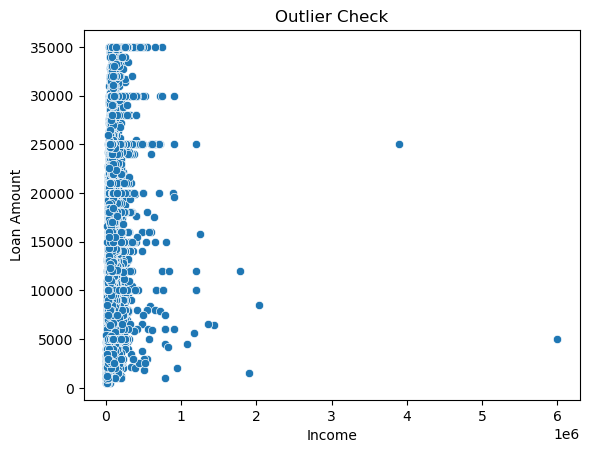

In [41]:
# Create scatter plot
sns.scatterplot(x=loan_df['annual_inc'], y=loan_df['loan_amnt'])

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Outlier Check')
# Show plot
plt.show()

Seems like there are many rows with income above 1 million. I will set an income threshold to ~200000 for more realistic incomes

In [42]:
loan_df = loan_df[loan_df['annual_inc'] < 200000]

In [43]:
# check distribution of loan status
loan_df['loan_status'].value_counts()

Fully Paid     32332
Charged Off     5556
Current         1121
Name: loan_status, dtype: int64

The dataset includes entries where customers are classified as 'current.' These entries can be excluded from our analysis since our objective is solely to predict whether a customer will default on a loan, rendering the 'current' status irrelevant for our purposes.
- Remove Rows that are current customers

In [44]:
loan_df = loan_df[loan_df.loan_status != "Current"]

Fully Paid     0.853357
Charged Off    0.146643
Name: loan_status, dtype: float64


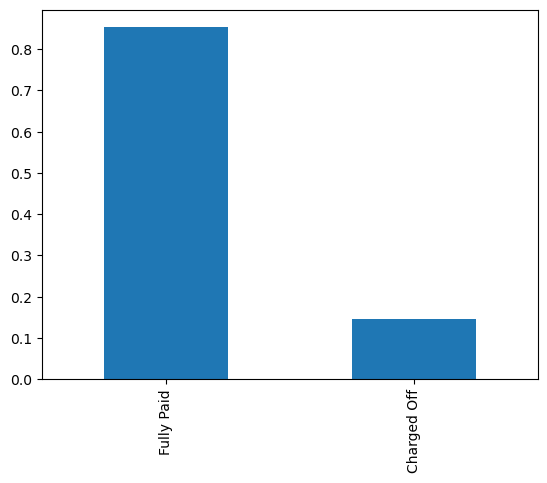

In [45]:
loan_df['loan_status'].value_counts(normalize =True).plot(kind = 'bar')

print(loan_df['loan_status'].value_counts(normalize =True))

Our target variable has about a 85/15 percent split <br>

We can check for multicolinnearity quickly and remove some columns

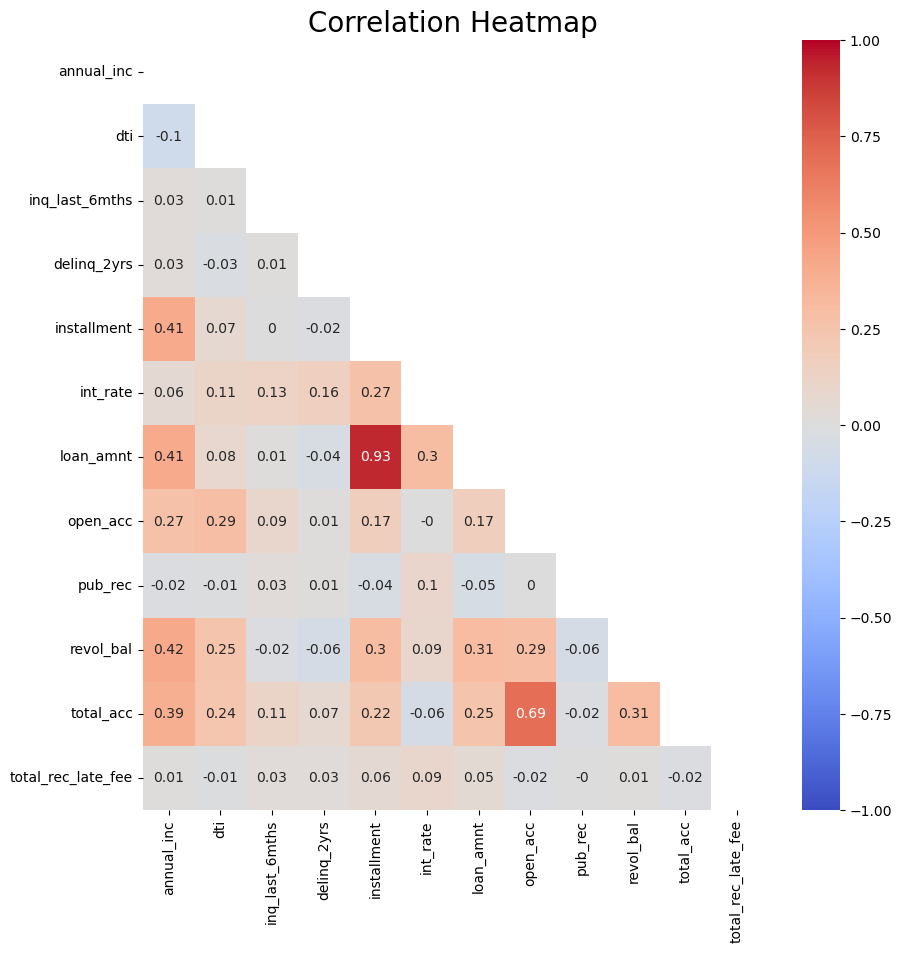

In [46]:
#heatmap to check for colinearity
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(loan_df.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

Remove multicollinear variables
- installment, open_acc

In [47]:
# drop columns
columns_to_drop = ['installment', 'open_acc']
loan_df = loan_df.drop(columns=columns_to_drop)

We can now start preparing our data for modelling by binarizing our target variable and one-hot-encoding our categorical variables

In [48]:
# change target to binary
loan_df['loan_status_paid'] = np.where(loan_df['loan_status'] == 'Fully Paid', 0, 1)

In [49]:
# check column
loan_df['loan_status_paid'].value_counts()

0    32332
1     5556
Name: loan_status_paid, dtype: int64

In [50]:
# drop original target column
loan_df = loan_df.drop(columns=['loan_status'])

In [51]:
# Get a list of all categorical columns
categorical_columns = loan_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(loan_df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
df_encoded.head()

,annual_inc,dti,inq_last_6mths,delinq_2yrs,int_rate,loan_amnt,pub_rec,revol_bal,total_acc,total_rec_late_fee,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified
0,24000.0,27.65,1,0,10.65,5000,0,13648,9,0.00,...,0,0,0,0,0,0,0,0,0,1
1,30000.0,1.00,5,0,15.27,2500,0,1687,4,0.00,...,0,0,0,0,0,0,0,1,1,0
2,12252.0,8.72,2,0,15.96,2400,0,2956,10,0.00,...,0,0,0,0,1,0,0,0,0,0
3,49200.0,20.00,1,0,13.49,10000,0,5598,37,16.97,...,0,0,1,0,0,0,0,0,1,0
5,36000.0,11.20,3,0,7.90,5000,0,7963,12,0.00,...,0,0,0,0,0,0,1,0,1,0


In [52]:
df_encoded.shape

(37888, 37)

Our new dataframe has 37 features and is ready for modeling

# Model Training <a name="Model_Training"></a>
- SKlearn Library
    - train and test split, cross validation
    - Classification Models: LogReg, Random Forest, Gradient Boost, XGBoost Forest

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [53]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [54]:
#  set target
y = df_encoded['loan_status_paid']
# set features
X= df_encoded.drop(['loan_status_paid'], axis=1)

First, we can split our data into train and test sets
- we can further split our training data into a validation set and use cross-validation to train our model
- after we get a cross-validation score, we can use the test set to evaluate the model

In [55]:
# Step 1: Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1.2: Create a train-test split for validation data
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Step 2: Further split the training set into training and validation sets using k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000) 

# Step 3: Train and validate the model using k-fold cross-validation on the validation data
cv_scores = cross_val_score(logreg_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores:
[0.85506928 0.85396965 0.85635724 0.85745711 0.85767708]
Mean CV Accuracy: 0.86


The validation accuracy is 86% <Br>
Train and check the test accuracy and compare the two values

In [56]:
# Step 4: Train the final model on the full training set
logreg_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
test_predictions = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.85


In [57]:
# Print classification report
class_report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      6435
           1       0.41      0.03      0.05      1143

    accuracy                           0.85      7578
   macro avg       0.63      0.51      0.48      7578
weighted avg       0.78      0.85      0.79      7578



The validation and test accuracy are very similar, this tells us that the model is not overfit <br>
The recall for the target variable is very low, meaning that the model has a hard time accuratley classifying if someone will default on their loan. This is probably due to the high class imbalance at 15/85 <br>
I will train other models and view these metrics as well

In [59]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
dt_model = RandomForestClassifier(min_samples_split = 10)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

# Step 4: Train the final model on the full training set
dt_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
test_predictions = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report
class_report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(class_report)

Cross-Validation Accuracy Scores:
[0.86320651 0.86562569 0.86471623 0.8625165  0.86515618]
Mean CV Accuracy: 0.86
Test Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6435
           1       0.78      0.11      0.19      1143

    accuracy                           0.86      7578
   macro avg       0.82      0.55      0.56      7578
weighted avg       0.85      0.86      0.81      7578



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(min_samples_split = 10)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

# Step 4: Train the final model on the full training set
gb_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
test_predictions = gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report
class_report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(class_report)

Cross-Validation Accuracy Scores:
[0.86276666 0.86980427 0.86559613 0.86471623 0.86845579]
Mean CV Accuracy: 0.87
Test Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6435
           1       0.78      0.13      0.22      1143

    accuracy                           0.86      7578
   macro avg       0.82      0.56      0.57      7578
weighted avg       0.85      0.86      0.82      7578



In [64]:
from xgboost import XGBClassifier

params = {
    'objective': 'binary:logistic',  # Learning task and objective function
    'n_estimators': 100,              # Number of boosting rounds (trees)
    'learning_rate': 0.1,             # Step size at each boosting round
    'max_depth': 3,                   # Maximum depth of each tree
    'subsample': 0.8,                 # Fraction of samples used to train each tree
    'colsample_bytree': 0.8,          # Fraction of features used to train each tree
    'reg_alpha': 0.1,                 # L1 regularization term
    'reg_lambda': 0.1,                # L2 regularization term
    'scale_pos_weight': 1,            # Weight for positive class in imbalanced classification
    'random_state': 42                # Random seed for reproducibility
}

xgb_model = XGBClassifier(**params)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model, X_train_val, y_train_val, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')

# Step 4: Train the final model on the full training set
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
test_predictions = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report
class_report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(class_report)

Cross-Validation Accuracy Scores:
[0.86276666 0.86980427 0.86559613 0.86471623 0.86845579]
Mean CV Accuracy: 0.87
Test Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6435
           1       0.82      0.13      0.22      1143

    accuracy                           0.86      7578
   macro avg       0.84      0.56      0.57      7578
weighted avg       0.86      0.86      0.82      7578



In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ('Logistic Regression', LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000)),
    ('Random Forest', RandomForestClassifier(min_samples_split = 10)),
    ('GB', GradientBoostingClassifier(min_samples_split = 10)),
    ('XGB', XGBClassifier(**params))
]

# Print header
print(f"{'Model':<20} {'Precision':<20} {'Recall':<20} {'F1 Score':<20}")

# Loop through models
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"{name:<20} {precision:<20.2f} {recall:<20.2f} {f1:<20.2f}")


Model                Precision            Recall               F1 Score            
Logistic Regression  0.41                 0.03                 0.05                
Random Forest        0.75                 0.11                 0.19                
GB                   0.78                 0.13                 0.22                
XGB                  0.82                 0.13                 0.22                


The summary of each model's precision/recall/F1 score tell us that the XGB Forest and GB forest perform the best overall.

To determine how these model's differ, we can look into the coeffient's and feature importance of each model and compare them

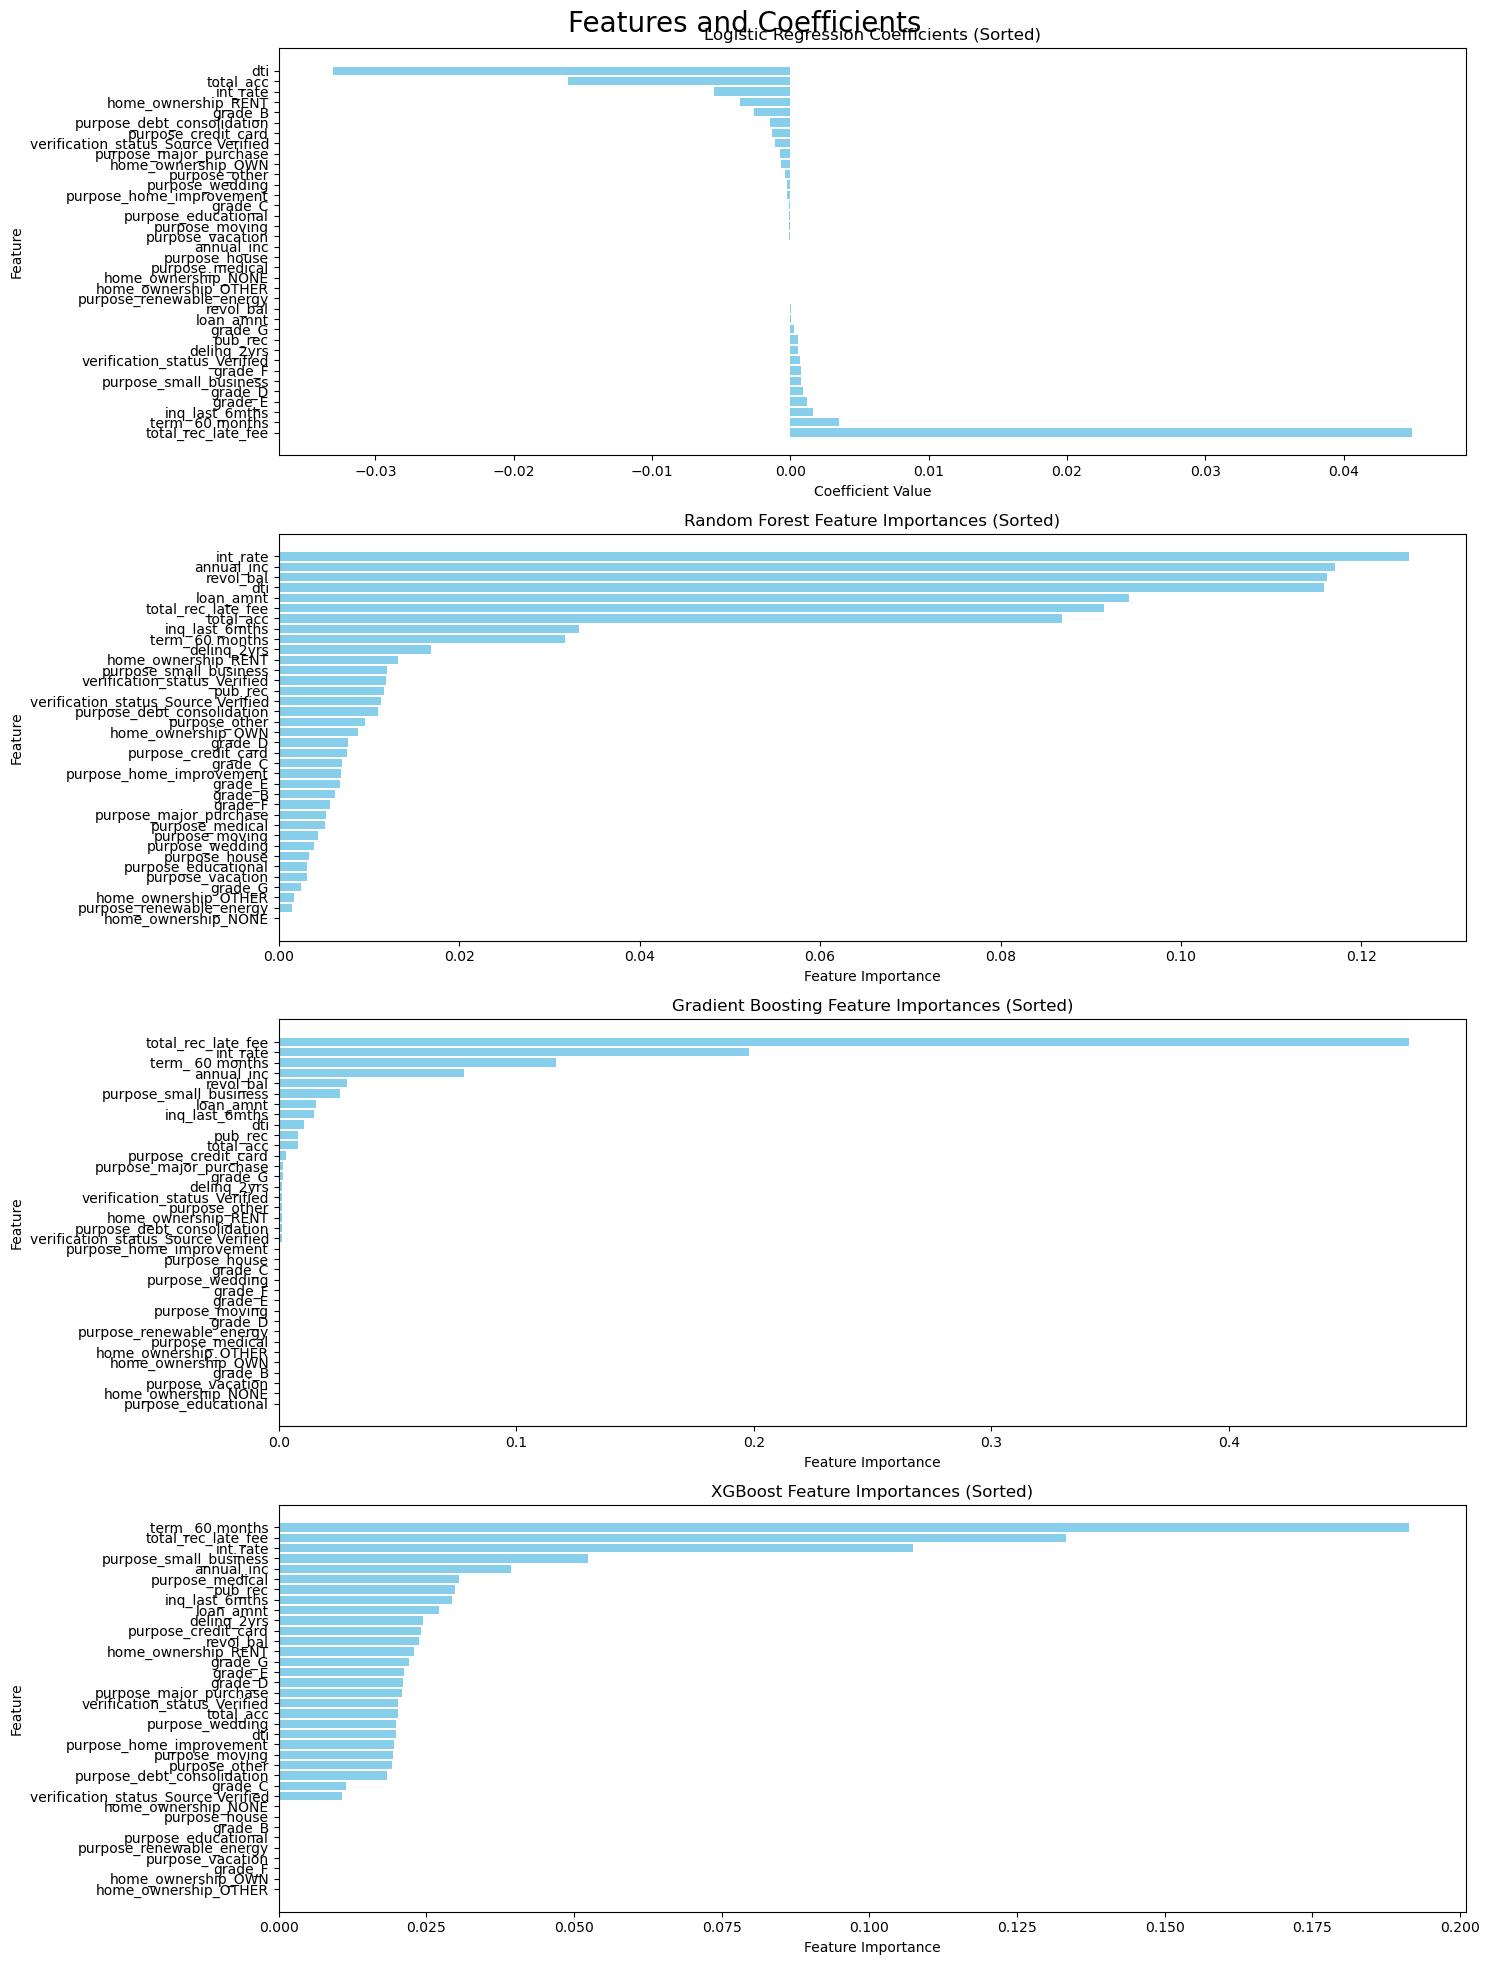

In [83]:
# Get the coefficients and feature names
feature_names = X_train.columns

#make subplots
plt.subplots(4,1, figsize = (15,20))
plt.suptitle('Features and Coefficients', size =20)

plt.subplot(4,1,1)

# coefficients of logreg model
coefficients = logreg_model.coef_[0] 
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the coefficients
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top


plt.subplot(4,1,2)
# Sort feature importances and feature names in descending order
importances = dt_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot feature importances
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top


plt.subplot(4,1,3)
# Sort feature importances and feature names in descending order
feature_importances = gb_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature importances
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top


plt.subplot(4,1,4)
# Sort feature importances and feature names in descending order
feature_importances = xgb_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature importances
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top


plt.tight_layout()

The regression coefficients tell us that 'total_acc' and 'dti' are strong predictors that the person will not default on their loan and the 'total_rec_late_fee' is a positive predictor for defaulting on a loan <br>


The random forest model chose 'int_rate' and 'annual_inc' as the most important features


The boosted forest chose 'total_rec_late_fee' and 'int_rate' as the most important features


the xgboost forest chose 'term_60_months' and 'total_rec_late_fee' as the most important features


The standard way to proceed would be to take out the most important features and train the models again to see how well they perform. But herw i will stop to evaluate the models with an AUC/ROC Curve.

In [66]:
model_test = [logreg_model, dt_model, gb_model, xgb_model]

for i, e in enumerate(model_test):

    e.fit(X_train, y_train)
    test_predictions = e.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(i, e, test_accuracy)

0 LogisticRegression(C=0.1, max_iter=1000) 0.8471892319873318
1 RandomForestClassifier(min_samples_split=10) 0.8603853259435207
2 GradientBoostingClassifier(min_samples_split=10) 0.8628925837951966
3 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...) 0.8642121931908155


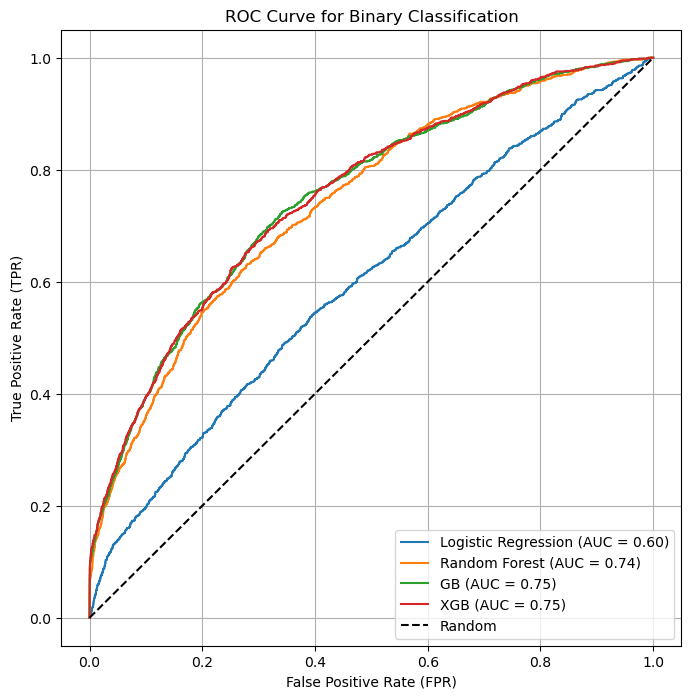

In [67]:
from sklearn.metrics import roc_curve, auc

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ('Logistic Regression', LogisticRegression(penalty = 'l2', C= 0.1, max_iter = 1000)),
    ('Random Forest', RandomForestClassifier(min_samples_split = 10)),
    ('GB', GradientBoostingClassifier(min_samples_split = 10)),
    ('XGB', XGBClassifier(**params))
]

# Plot ROC curves for each model
plt.figure(figsize=(8, 8))

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Summary <a name="Summary"></a>

Cleaning
- features of the dataset were selected
- outliers were removed

Model Training
- classification models were trained and evaluated with Precision/Recall/F1 Scores
- each model's coefficients/features were examined